

#  Monte Carlo Errors and other estimation methods

##### Keywords: monte-carlo, integration,  central limit theorem

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time


## The basic idea

Let us formalize the basic idea behind Monte Carlo Integration in 1-D.

Consider the definite integral:

$$ I = \int_{a}^{b} g(x) \, dx $$

Then it can be written as :

$$ I =  \int_{a}^{b}(b-a)  \frac{g(x)}{(b-a)} = (b-a) \int_{a}^{b}  \frac{g(x)}{(b-a)} \, dx $$

Recall that uniform distribution between a and be has the probability density function:

$$ f_{ab}(x) = \frac{1}{b-a},x\in [a,b]$$


So the above integral $I$ can be written as:

$$ I = (b-a) E_{U[a,b]}[g(x)]$$

Note that the expected value of $f(x)$ where $x~U[a,b]$ is calculated as
$$E_{U[a,b]}[g(x)] := \int_{a}^{b} g(x)  f_{U[a,b]} dx$$

And central limit says that:

 $$E_{U[a,b]}[g(x)]= \lim_{n \to \infty} \frac{1}{N}\sum_{x_i \sim U} g(x_i)$$

### Example. 

**Calculate the integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx. $**

We know from calculus that the anti-derivative is 
$$ x^3/3 + 4\sin(x) -4x\cos(x). $$ 

To solve this using MC, we simply draw $N$ random numbers from 2 to 3 and then take the average of all the values $f(x)=x^2 + 4 \, x \,\sin(x)$ and normalized over the volume; this case the volume is 1 (3-2=1). 

In [2]:
def f(x):
    return x**2 + 4*x*np.sin(x) 

def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

Monte Carlo estimation= 11.8151950975 Exact number= 11.8113589251


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


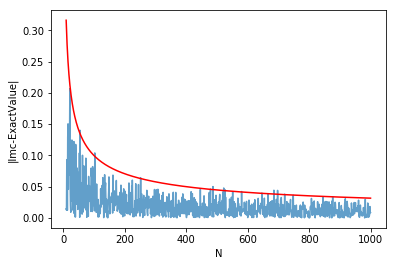

In [3]:
a = 2;    
b = 3; 

# use N draws 
N= 10000

X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
Y =f(X)   # CALCULATE THE f(x) 
V = b-a
Imc= V * np.sum(Y)/ N;

exactval=intf(b)-intf(a)

print("Monte Carlo estimation=",Imc, "Exact number=", intf(b)-intf(a))
# to store MC estimate for each N
Imc=np.zeros(1000)

# just to store N
Na = np.linspace(0,1000,1000)

# calculus result
exactval= intf(b)-intf(a)

# for each N run monte carlo to estimate integral
for N in np.arange(0,1000):
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[N]= (b-a) * np.sum(Y)/ N;
    
    
plt.plot(np.arange(10,1000),abs(Imc[10:]-exactval), alpha=0.7)#np.sqrt((Imc[10:]-exactval)**2), alpha=0.7)
plt.plot(np.arange(10,1000), 1/np.sqrt(Na[10:]), 'r')
plt.xlabel("N")
plt.ylabel("|Imc-ExactValue|")

# 
plt.show()

Obviously this depends on the number of $N$ as $1/\sqrt{N}$. 

## Errors in MC

Monte Carlo methods yield approximate
answers whose accuracy depends on the number of draws.

So far, we have used our knowledge of the exact value  to determine that the
error in the Monte Carlo method approaches zero as approximately $1/\sqrt{N}$ for large $N$, where $N$ is the number of trials. 

But in the usual case, the exact answer is unknown. Why do this otherwise?So, lets repeat the same evaluation $m$ times and check the variance of the estimate. 

### Example. The same as before, but we fix the number of draws N = 10,000 and   repeat it 1000 times

**Calculate the integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx. $**


mean: 11.8112880207 , std: 0.00421757811173


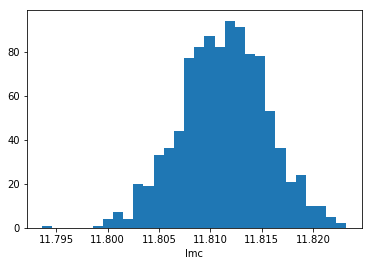

In [8]:
# multiple MC estimations
m=1000
N=10000
Imc=np.zeros(m)


for i in np.arange(m):
    
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 
    Imc[i]= (b-a) * np.sum(Y)/ N;
    
    
plt.hist(Imc, bins=30)
plt.xlabel("Imc")
print('mean:',np.mean(Imc), ', std:',np.std(Imc))


This looks like our telltale Normal distribution.

This is not surprising

### Estimating the error in MC integration using the CLT.

We know from the CLT that if $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$, and that if $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. 

Then, 

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$


This is true *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

The sums

$$S_n(f) = \frac{1}{n} \sum_{i=1}^{n} f(x_i) $$

are exactly what we want to calculate for Monte-Carlo Integration(due to the MLE) and correspond to the random variable f(X) where X is uniformly distributed on the support.

Whatever the original variance of f(X) might be, we can see that the variance of the sampling distribution of the mean goes down as $1/n$ and thus the standard error goes down as $1/\sqrt{n}$ as we discovered when we compared it to the exact value as well.

Why is this important?

In [ ]:
## We need to fix the total samples (N = 10000) for each experiment. 
## Repeat doing the same experiment to get a more accurate answer 
## as approximation of the integral


### Comparing to standard integration techniques
### Rectangle Rule

If we divide the $a, b$-interval into $N$ 
steps and use some regular integration routine, what is the error? Consider the Rectangle Rule as illustrated in this diagram from Wikipedia:

![](https://upload.wikimedia.org/wikipedia/commons/5/5b/Rectangle_rule.gif)
The basic idea is that the function value at the left of the interval is used as the height of the approximating rectangle. In general, the differing methods consist of choosing different $x_i$ below. $\Delta x = \frac{b-a}{n}$
$$I_{est} = \sum_i f(x_i)\Delta x = \frac{b-a}{n} \sum_i f(x_i)$$

$x_i = a+i\dot\Delta x,$ where  $i = 0,1,2,...,n-1$. 
The error on the estimation of the integral can be shown to decrease as $\frac{1}{n^2}$.

In [9]:
def left_int(func,a,b,n):
    delta_x = (b - a)/n
    left_x  = np.arange(a,b,delta_x)
    estimate= delta_x*np.sum(func(left_x))
    return estimate

a = 2.
b = 3.
N = 10000

left_integral = left_int(f,a,b,N)
left_err = np.abs(left_integral - exactval)

print('left_integral = ',left_integral,
      'left_integral err= ',left_err)



left_integral =  11.811387964 left_integral err=  2.90389439979e-05



## what if I choose a different x_i ?
If we divide the $a, b$-interval into $N$ 
steps and use some regular integration routine, what is the error? Consider choosing $x_i$ as the midpoint of each tiny interval

Different from before (useing left point as height, we use the f(midpoint) as height).$\Delta x = \frac{b-a}{n}$

$$I_{est} = \sum_i f(x_i)\Delta x = \frac{b-a}{n} \sum_i f(x_i)$$

Now $x_i = a+ i\Delta x + \frac{\Delta x}{2}$, where $i=0,1,2,... n-1$

In [10]:
def midpt_int(func,a,b,n):
    delta_x = (b - a)/n
    mid_x   = np.arange(a,b,delta_x) +  delta_x/2
    estimate= delta_x*np.sum(func(mid_x))
    return estimate

a = 2.
b = 3.
N = 10000

midpt_integral = midpt_int(f,a,b,N)
midpt_err = np.abs(midpt_integral - exactval)

print('midpt_integral = ',midpt_integral,
      'midpt_err     = ',midpt_err)



midpt_integral =  11.8113589291 midpt_err     =  4.00740951534e-09


##  Trapezoid Rule
We calculat individual area us a trapezoid

![](https://upload.wikimedia.org/wikipedia/commons/4/40/Trapezoidal_rule_illustration.svg)
The basic idea is that the little areas is
$$\frac{(f(x_i)+f(x_{i+1}))\cdot \Delta x }{2}$$
So the area of estimation is: $\Delta x = \frac{b-a}{n}$
$$I_{est} = \sum_{i=0}^{n-1} \frac{(f(x_i)+f(x_{i+1}))\cdot \Delta x }{2} = \frac{\Delta x }{2}\sum_i (f(x_i)+f(x_{i+1}))$$

$x_i = a+i\dot\Delta x,$ where  $i = 0,1,2,...,n-1$. 
The error on the estimation of the integral can be shown to decrease as $\frac{1}{n^3}$.



In [11]:
def trapz_int(func,a,b,n):
    delta_x = (b - a)/n
    left   = np.arange(a,b,delta_x) 
    right  = np.arange(a+delta_x,b+delta_x,delta_x) 
    estimate= delta_x*(np.sum(f(left))+np.sum(f(right))) / 2
    return estimate

a = 2.
b = 3.
N = 10000

trapz_integral = trapz_int(f,a,b,N)
trapz_err = np.abs(trapz_integral - exactval)

print('trapz_integral = ',trapz_integral,
      'trapz_err     = ',trapz_err)



trapz_integral =  11.8113589171 trapz_err     =  8.02189781268e-09


## The basic reason for this can be understood on a taylor series expansion of the function to second order. When you integrate on the sub-interval, the linear term vanishes while the quadratic term becomes cubic in $\Delta x$. So the local error goes as $\frac{1}{n^3}$ and thus the global as  $\frac{1}{n^2}$.


### Example. The same as before, but we fix the number of draws N = 10,000 and   repeat it 1000 times

**Calculate the integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx. $**

We know from calculus that the anti-derivative is 
$$ x^3/3 + 4\sin(x) -4x\cos(x). $$ 


In [27]:
def f(x):
    return x**2 + 4*x*np.sin(x) 

def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

# copy the past monte carlo method:
a = 2.
b = 3.
exactval=intf(b)-intf(a)


N = 10000
exactval=intf(b)-intf(a)
Y =f(np.random.uniform(low=a, high=b, size=N))   # CALCULATE THE f(x) 
Imc= (b-a) * np.sum(Y)/ N;
mc_err = np.abs(Imc-exactval)

print("Monte Carlo estimation=",Imc, "Exact number=",exactval)



Monte Carlo estimation= 11.8149037481 Exact number= 11.8113589251


In [28]:
def left_int(func,a,b,n):
    delta_x = (b - a)/n
    left_x  = np.arange(a,b,delta_x)
    estimate= delta_x*np.sum(func(left_x))
    return estimate

In [30]:

left_integral = left_int(f,a,b,N)
left_err = np.abs(left_integral - exactval)

print("Monte Carlo estimation=",Imc,
      'left_integral = ',left_integral,
      "Exact number=", exactval)

print("Monte Carlo err  =" ,mc_err,
      'left_integral err= ',left_err)

Monte Carlo estimation= 11.8149037481 left_integral =  11.811387964 Exact number= 11.8113589251
Monte Carlo err  = 0.00354482298142 left_integral err=  2.90389439979e-05


## Error comparison



In [13]:
# to store MC estimate for each sampling, until we reach sampling 10000 times 
# to store left
N     = 10000
Imc   = np.zeros(N)
Ileft = np.zeros(N)

# just to store each time number of samples
# an array of 1,2,3... 10000
Na = np.linspace(1,N,N)


# keep track of computational time
Imc_time   = np.zeros(N)
Ileft_time = np.zeros(N)

# for each N run monte carlo to estimate integral
# and run left integral

for K in np.arange(1,N+1):
    t0        = time.time()
    Imc[K-1]  = (b-a) * np.mean(f(np.random.uniform(low=a, high=b, size=K)));
    t1        = time.time()
    Ileft[K-1]= left_int(f,a,b,K)
    t2        = time.time()
    Imc_time[K-1]  = t1-t0
    Ileft_time[K-1]= t2-t1
    


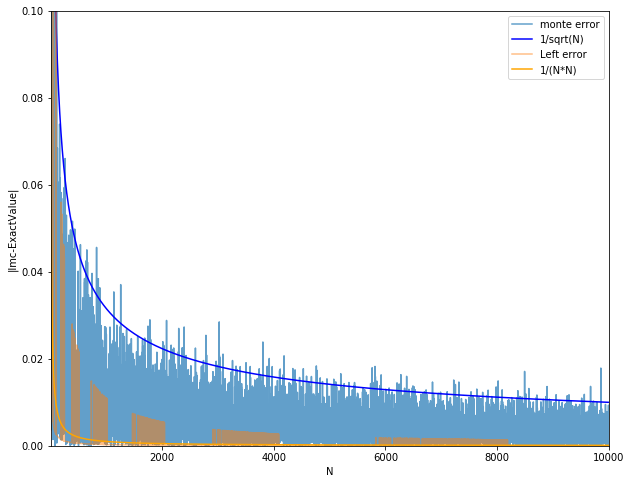

In [13]:
plt.figure(figsize = (10,8))
plt.plot(np.arange(10,N),abs(Imc[10:]-exactval), alpha=0.7, label = 'monte error')
plt.plot(np.arange(10,N), 1/np.sqrt(Na[10:])   , 'b', label = '1/sqrt(N)')
plt.plot(np.arange(10,N),abs(Ileft[10:]-exactval), alpha=0.5, label = 'Left error')
plt.plot(np.arange(10,N), 1/(Na[10:])            , 'orange', label = '1/(N*N)')

plt.ylim([0,0.1])
plt.xlim([10,N+1])

plt.xlabel("N")
plt.ylabel("|Imc-ExactValue|")
plt.legend()
# 
plt.show()

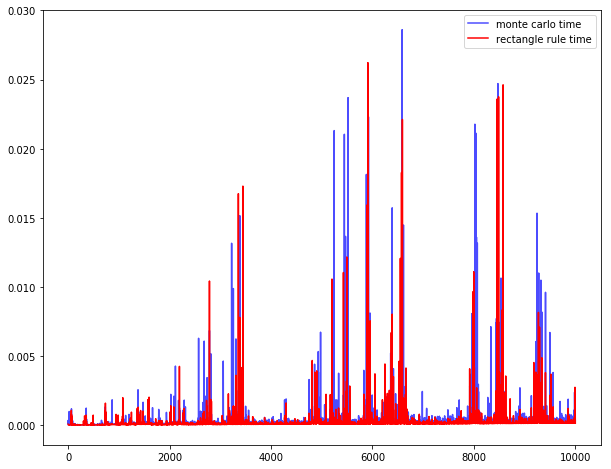

In [17]:
plt.figure(figsize = (10,8))
plt.plot(np.arange(0,N),Imc_time,color = 'b', alpha=0.7, label = 'monte carlo time')
plt.plot(np.arange(0,N), Ileft_time, color = 'r', label = 'rectangle rule time')

plt.legend()
# 
plt.show()